# Python to JavaScript tips

### Print is a jupyter demonstration function only -- not for pavlovia

In [1]:
%%HTML
<script>
current_cell = undefined;
function print(...value) {
    //# get the currently running cell:
    var outers = document.getElementsByClassName("cell code_cell rendered running")[0];
    //# the area into which text will be printed:
    var print_space = outers.getElementsByClassName("output_subarea output_html rendered_html")[0];
    //# make the current cell empty the first time you print to it.
    if (!current_cell || current_cell != print_space){
        current_cell = print_space;
        print_space.innerHTML = "";
    }
    //# add the text to a new line with div:
    print_space.innerHTML += ("<div>"+value+"</div>").replaceAll(", ", ",").replaceAll(",", ", ").replaceAll("\n", "</div><div>");
    //print_space.innerHTML = "";
    
    
}
print("Hello Jupyter Cell");
</script>

In [2]:
%%HTML
<script>
function print_dict_arr(d) {
    //# get the currently running cell:
    var outers = document.getElementsByClassName("cell code_cell rendered running")[0];
    //# the area into which text will be printed:
    var print_space = outers.getElementsByClassName("output_subarea output_html rendered_html")[0];
    //# make the current cell empty the first time you print to it.
    if (!current_cell || current_cell != print_space){
        current_cell = print_space;
        print_space.innerHTML = "";
    }
    keys = Object.keys(d);
    print(keys);
        
    key = keys[0];
    rows = d[key].length;
    range(rows).forEach(function(i){
        print_space.innerHTML += "<div>"
        keys.forEach(function(key, k) {
            //# add the text to a new line with div:
            print_space.innerHTML += d[key][i];
            if (k<keys.length-1){
                print_space.innerHTML += ",";
            }
        });
        print_space.innerHTML += "<div>";
        print_space.innerHTML = print_space.innerHTML.replaceAll(", ", ",").replaceAll(",", ", ").replaceAll("\n", "</div><div>");
    });
    
    
    
}
d = {"a":[1,2,3,4], "b":[5,6,7,8]}
print_dict_arr(d);
</script>

# PsychoPy to Pavlovia conversions made easy

## Helper functions

In [3]:
%%HTML
<script>
//# because Pavlovia doesn't auto convert append or extend to push, 
//#  make the same functions work for any javascript array by affecting the prototype
Array.prototype.append = Array.prototype.push
Array.prototype.extend = function(arr) {this.push(...arr)};

arr = [1,2,3,4]
arr.append(5)
print(arr)
arr.extend([6,7,8])
print(arr)
</script>

In [4]:
def unpack_example(a,b="Nothing",c="Nothing"):
    print(a)
    print(b)
    print(c)
    
arr = [1,2,3]
unpack_example(*arr)

def print_all(*arguments):
    print(arguments)
    print(*arguments)
print_all(1,2,3)

1
2
3
(1, 2, 3)
1 2 3


In [5]:
%%HTML
<script>
//# how to format a class so that Pavlovia will accept it.
//#  can convert the quest plus class to this 
//#  format to make it work in Pavlovia without pasting it after export.
A = class {
    constructor(name) {
        this.name = name;
    }
    func(replace_name) {
        this.name = replace_name;
    }
}

a = new A("my name");
print(a.name)
a.func("new name");
print(a.name)
</script>

In [6]:
%%HTML
<script>
//# avoid using the "function name(){}" syntax
//#  to account for Pavlovia's scope problems.
range = function(start_stop, post_stop, step=1) {
    //# create a list sequence with a starting point, stopping point, and step size
    //#  the step size is assumed 1 if not provided
    //#  the first value is considered the stopping point if the second value is not given,
    //#   in which case the starting point is assumed to be 0.
    //#  post_stop is the non-inclusive end point.
    var arr = [];
    if (post_stop != undefined) {
        if (post_stop < start_stop) {
            for (var i = start_stop; i > post_stop; i+=step) {
                arr.push(i);
            }
        } else {
            for (var i = start_stop; i < post_stop; i+=step) {
                arr.push(i);
            }
        }
    } else {
        if (start_stop < 0) {
            for (var i = 0; i > start_stop; i+=step) {
                arr.push(i);
            }
        } else {
            for (var i = 0; i < start_stop; i+=step) {
                arr.push(i);
            }
        }
        
    }
    return arr;
}

round = function(value, decimals) {
    //# JavaScript's Math.round() doesn't normally
    //#  allow you to specify how many decimals you want!
    var tmp = Math.pow(10, decimals);
    return Math.round(value*tmp)/tmp;
}

arange = function(start_stop, post_stop, step=1, rounding=2) {
    //# same as range(), but with rounding built-in
    //# create a list sequence with a starting point, stopping point, and step size
    //#  the step size is assumed 1 if not provided
    //#  the first value is considered the stopping point if the second value is not given,
    //#   in which case the starting point is assumed to be 0.
    //#  post_stop is the non-inclusive end point.
    var arr = [];
    if (post_stop != undefined) {
        if (post_stop < start_stop) {
            for (var i = start_stop; round(i,rounding) > post_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        } else {
            for (var i = start_stop; round(i,rounding) < post_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        }
    } else {
        if (start_stop < 0) {
            for (var i = 0; round(i,rounding) > start_stop; i-=step) {
                arr.push(round(i,rounding));
            }
        } else {
            for (var i = 0; round(i,rounding) < start_stop; i+=step) {
                arr.push(round(i,rounding));
            }
        }
        
    }
    return arr;
}
arange(-10)

clone = function(arr) {
    //# a recursive function that deep copies arrays and dictionaries
    
    var loops, tmp;
    //# see if it is an array
    //#  check a couple of things to try to avoid objects with these keys
    if (Array.isArray(arr)) {
        loops = arr;
        tmp = [];
    } else {
        loops = Object.keys(arr);
        tmp = {};
    }
    loops.forEach(function(val){
        var value;
        //# if the looped items are the array, push() to a list
        if (loops === arr) {
            value = val;
            if (typeof(value) == "object") {
                //# if the subelement is another complex object, 
                //#  then clone it as well.
                tmp.push(clone(value));
            } else {
                tmp.push(value);
            }
        } else { //# if the looped items are the dictionary
                 //#  add them with the key
            value = arr[val];
            if (typeof(value) == "object") {
                //# if the subelement is another complex object, 
                //#  then clone it as well.
                tmp[val] = clone(value);
            } else {
                tmp[val] = value;
            }
        }
    })
    return tmp;
}
//# assumes start of 0 and step size of 1,
//#  and ends before 10
print("assumed start: 0, stop: 10, assumed step: 1")
print(range(10));
//# start of 5, end of 10, but assumes step size of 1.
print("start: 5, stop: 10, assumed step: 1")
print(range(5,10));
//# start of 0, end of 10, step size of 3.
print("start: 0, stop: 10, step: 3")
print(range(0,10,3));
//# includes float support, but doesn't 
//#  round or have as high floating point precision 
//#  like python's np.arange()
print("Floating point steps")
print(range(0,10.01,.5));
print(range(0,1.01,.1));
print("Rounded floating point step")
print(arange(0,1.01,.05, 2));

</script>

In [7]:
%%HTML
<script>
//# contains useful random number generation functions.
random = {"random": function(start_stop=1, post_stop=undefined, count=1) {
                var results = [];
                range(count).forEach(function(){
                  //# Math.random() never gives exactly 1, so it
                  //#  never reaches the provided max value.
                  if (post_stop != undefined) {
                      if (post_stop < start_stop) {
                          var tmp = post_stop;
                          post_stop = start_stop;
                          start_stop = tmp;
                      }
                      results.push((start_stop+Math.random()*(post_stop-start_stop)));
                  } else {
                      //# if post_stop is not defined, start_stop is the non-inclusive max value.
                      results.push((Math.random()*start_stop));
                  }
                });
                if (count == 1)
                    return results[0];
                return results;       
          }, 
          "randint":function(start_stop, post_stop, count=1){
                var results = [];
                range(count).forEach(function(){
                  //# Math.random() never gives exactly 1, so it
                  //#  never reaches the provided max value.
                  if (post_stop != undefined) {
                      if (post_stop < start_stop) {
                          var tmp = post_stop;
                          post_stop = start_stop;
                          start_stop = tmp;
                      }
                      results.push(parseInt(start_stop+Math.random()*(post_stop-start_stop)));
                  } else {
                      //# if post_stop is not defined, start_stop is the non-inclusive max value.
                      results.push(parseInt(Math.random()*start_stop));
                  }
                });
                if (count == 1)
                    return results[0];
                return results;
          },
          "choice":function(arr, count=1, with_replacement=true){
                var results = [];
                if (with_replacement) {
                    range(count).forEach(function(){
                        results.push(arr[random.randint(arr.length)]);
                    });
                } else {
                    //# make a shallow copy to choose from.
                    //#  you can always clone the returned result if you want unique copies,
                    //#  and it makes no difference for arrays of primitives 
                    //#  (like numeric indices or string keys).
                    var tmp = [...arr];//clone(arr);
                    console.log(tmp);
                    range(count).forEach(function(){
                        if (tmp.length == 0)
                            //# refill the array
                            tmp = [...arr];//clone(arr);
                        results.push(tmp.splice(random.randint(tmp.length),1));
                    });
                }
                if (count == 1)
                    return results[0];
                return results;
          }};
arr = [1,2,3,4,5];
print("5 Random floats in the space [0,1)")
print(random.random(0,1,5));
print("5 Random floats in the space [5,10)")
print(random.random(5,10,5));
print("5 Random integers in the space [5,10)")
print(random.randint(5,10, 5));
print("5 Random choices with replacement")
print(random.choice(arr, 5));
print("5 Random choices without replacement")
print(random.choice(arr, 5, false));
//# causes repeats only after the array is depleted.
print("Random choices without replacement, exceeding the size of the array")
print(random.choice(arr, arr.length*2, false));
</script>

## For Each Loops
JavaScript's for loops are usually very different than Python's, but there are ways to make them do very similar things.

In [8]:
# loops through list/array contents

# python's range function is a generator, rather than a list
arr = list(range(1,6))
for value in arr:
    print(value)

# same as:
for i in range(len(arr)):
    print(arr[i])

1
2
3
4
5
1
2
3
4
5


In [9]:
%%HTML
<script>
arr = range(1,6);
//# this JavaScript for loop version looks silly, but has 
//#  fewer places to make mistakes, and
//#  as we will see later, is the more generically useful of the two forms.
arr.forEach(function(value) {
    print(value);
});

//# same as above, but more settings:
//# there are controls for the starting point; stopping point; and step size (i++ is the same as i+=1)
for (var i=0; i < arr.length; i++) {
    print(arr[i]);
}
</script>

## Scope and complex forEach's

In [10]:
# loops through list/array contents while also enumerating to get the index
arr = list(range(1,6))
for i,value in enumerate(arr):
    print("index:", i, " value:", value, " arbitrary indexing:", arr[0])

# the "scope" refers to the space in which a variable is declared.
#  indentations past each ':' for functions, conditionals, and loops are different scopes 
#  and can declare separate variables with the same names without influencing each other.

def scope_demoA():
    # JavaScript assumes a variable is global unless told otherwise.
    # Python assumes a variable is local unless told otherwise.
    
    # by default, a variable is local to this Python function 
    #  and not affect the outer, global arr:
    arr = [4,3,2,1]
    return arr

def scope_demoB():
    # this is how you make a variable global to this Python function 
    #  and affect the outer, global arr:
    global arr # this must be the first real line of code in the function!
    
    arr = [4,3,2,1]
    return arr

print("Locally change Arr")
print(scope_demoA())
print("Unchanged:")
print(arr)
print("Globally change Arr")
print(scope_demoB())
print("Changed:")
print(arr)

index: 0  value: 1  arbitrary indexing: 1
index: 1  value: 2  arbitrary indexing: 1
index: 2  value: 3  arbitrary indexing: 1
index: 3  value: 4  arbitrary indexing: 1
index: 4  value: 5  arbitrary indexing: 1
Locally change Arr
[4, 3, 2, 1]
Unchanged:
[1, 2, 3, 4, 5]
Globally change Arr
[4, 3, 2, 1]
Changed:
[4, 3, 2, 1]


In [11]:
%%HTML
<script>
arr = range(1,6);
arr.forEach(function(value, i) {
    print("index: "+ i, " value: "+ value, " arbitrary indexing: "+arr[0])
});
print("Strict scope pedantry")
//# the previous scope technially already defines arr, 
//#  but there is an optional 3rd parameter you can declare it explicitly
//#  if you have very complex code with many scopes.

//# the "scope" refers to the space in which a variable is declared.
//#  each set of {}'s for functions, conditionals, and loops are different scopes 
//#  and can declare separate variables with the same names without influencing each other.


//#  Pavlovia handles declarations of global variables in the background, 
//#   so only declare variables in builder with "var" if you are using it in a function where it should be separate.
arr.forEach(function(value, i, arr_scope_name) {
    print("index: "+ i, " value: "+ value, " arbitrary indexing: "+arr_scope_name[0])
});

function scope_demoA(){
    //# JavaScript assumes a variable is global unless told otherwise.
    //# Python assumes a variable is local unless told otherwise.
    
    //# this is how you make a variable local to this JavaScript function 
    //#  and not affect the outer, global arr:
    var arr = [4,3,2,1];
    return arr;
}
function scope_demoB(){
    arr = [5,4,3,2];
    return arr;
}
//# scope demo A's "arr" doesn't override the global arr
print("Locally change Arr")
print(scope_demoA());
print("Unchanged:")
print(arr);

//# scope demo B's "arr" does override the global arr
print("Globally change Arr")
print(scope_demoB());
print("Changed:")
print(arr);

</script>

# Dictionaries

In [12]:
d = {'a':1, 'b':2, 'c':3}
for key in d:
    # do something with each key, including accessing the dictionary.
    print(key+",", d[key])

a, 1
b, 2
c, 3


In [13]:
%%HTML
<script>
//# dictionary's rough equivalent is an Object:
d = {'a':1, 'b':2, 'c':3}
//# get the list of dictionary keys from the Object named 'd'
keys = Object.keys(d);
//# do something with each key, including accessing the dictionary.
keys.forEach(function(key) {
    print(key, " "+d[key]);
});
</script>

# List comprehension

In [14]:
# the minimum requirements of list comprehension: construct an array based on 
#  an expression that gives a value (left side) and a loop (right side).
p = [i*i for i in range(1, 10)]
print("The resulting list from a list comprehension containing squared values from 1 to 9")
print(p)

The resulting list from a list comprehension containing squared values from 1 to 9
[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [15]:
%%HTML
<script>
//# make the empty array to build into.
p = [];
//# add values to the array with the push() function.
range(1, 10).forEach(function(i){p.push(i*i)});
print("The resulting list from a list comprehension containing squared values from 1 to 9")
print(p);

</script>

In [16]:
%%HTML
<script>
//# make the empty array to build into.
sv = [];
pre_existing = random.randint(1, 51, 72);
alpha = 1.1;
beta = 0.5;
probability = .5;
ambiguity = 0;
//# add values to the array with the push() function.
pre_existing.forEach(function(money){sv.push((probability - beta*ambiguity/2)*Math.pow(money, alpha))});
print(sv);

</script>

# List comprehension with conditionals

In [17]:
# conditional list comprehension adds a conditional statement to 
#  whether the expression should be added to the new list.
p = [i*i for i in range(1, 10) if i%2==0]
print("Only even values squared and kept in a list comprehension")
print(p)

Only even values squared and kept in a list comprehension
[4, 16, 36, 64]


In [18]:
%%HTML
<script>
//# make the empty array to build into.
p = [];
//# if there is exactly one line 'underneath' it 
//#  (like in this example and all python list comprehensions), 
//#  then the if statement does not need to add extra brackets.
//# add values to the array with the push() function.
range(1, 10).forEach(function(i){if(i%2==0) p.push(i*i)});
print("Only even values squared and kept in a list comprehension")
print(p);

</script>

## Copying 1-dimensional arrays of primitives

In [19]:
arr = [1,2,3,4,5]
# lists and dictionaries are stored by the _reference_ 
#  to the real content in memory, 
#  so errors like this don't make copies of the contents, 
#  just the reference to the same content.
bad_copy = arr
# if the contents are primitive (like numbers and strings)
#  you can place them all into a new list with the unpacking operator '*'
arr_copy = [*arr]
arr_copy[0] = 5

print("Correctly copied contents modified separately:")
print(arr_copy)
print("Original contents not modified by a good copy:")
print(arr)
# using copies of a reference affects the original contents
bad_copy[0] = 0
print("Original contents modified by a bad copy.")
print(arr)

Correctly copied contents modified separately:
[5, 2, 3, 4, 5]
Original contents not modified by a good copy:
[1, 2, 3, 4, 5]
Original contents modified by a bad copy.
[0, 2, 3, 4, 5]


In [20]:
%%HTML
<script>
arr = [1,2,3,4,5];
bad_copy = arr;
//# the main difference in JavaScript is that the unpacking operator is different.
//# It's "..." instead of "*"
arr_copy = [...arr];
arr_copy[0] = 5;

print("Correctly copied contents modified separately:")
print(arr_copy)
print("Original contents not modified by a good copy:")
print(arr)
//# using copies of a reference still affects the original contents
bad_copy[0] = 0
print("Original contents modified by a bad copy.")
print(arr)
</script>

## Copying multidimensional arrays

In [21]:
# python can use numpy to copy things, but it needs 
#  to be a numpy array and not a standard python list.
import numpy as np
arr = np.array([list(range(1,10,2)), list(range(2,12,2))])
arr_copy = np.ndarray.copy(arr)
arr_copy[0,1]=-10
print("Copy")
print(arr_copy)
print("Original")
print(arr)

# again, demonstrating copying just the reference to the content in memory is bad.
bad_copy = arr;
bad_copy[0,1] = 999
print("Original Contents modified by a bad copy.")
print(arr)

# you can convert it back to a python list though:
print("From numpy back to List form.")
print(arr_copy.tolist())

Copy
[[  1 -10   5   7   9]
 [  2   4   6   8  10]]
Original
[[ 1  3  5  7  9]
 [ 2  4  6  8 10]]
Original Contents modified by a bad copy.
[[  1 999   5   7   9]
 [  2   4   6   8  10]]
From numpy back to List form.
[[1, -10, 5, 7, 9], [2, 4, 6, 8, 10]]


In [22]:
%%HTML
<script>

arr = [range(1,10,2), range(2,12,2), 3];
print("Original");
print(arr[0])
print(arr[1])
print(arr[2])
arr_copy = clone(arr);
//# can't use tuple indexing like in python
//#  must use a pair of []'s for every dimension
arr_copy[0][1]=-10;
arr_copy[2] = 1;
//# my print is simpler than python's, 
//#  so let's separate the dimensions with two prints

print("Good Copy");
print(arr_copy[0])
print(arr_copy[1])
print(arr_copy[2])
print("Original contents still the same");
print(arr[0])
print(arr[1])
print(arr[2])
//# again, demonstrating shallow copying just the reference to the content in memory is bad.
bad_copy = [...arr];
bad_copy[0][0] = 999;
bad_copy[2] = 1;
print("Bad Copy Contents.");
print(bad_copy[0])
print(bad_copy[1])
print(bad_copy[2])
print("Original Contents modified by a bad shallow copy.");
print(arr[0])
print(arr[1])
print(arr[2])
</script>

## Cloning dictionaries

In [23]:
import pandas as pd
d = {"value":list(range(10)), "category":list(range(10))}
d_copy = pd.DataFrame(d).copy().to_dict('list')
d_copy["value"][0] = -10
print("Copy modified separately", d_copy)
print("Unmodified original     ", d)
# again, demonstrating copying just the reference to the content in memory is bad.
bad_copy = d;
bad_copy["value"][0] = 999
print("Original Contents modified by a bad copy:\n                        ", d)

Copy modified separately {'value': [-10, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
Unmodified original      {'value': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
Original Contents modified by a bad copy:
                         {'value': [999, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'category': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [24]:
# bad shallow copy function by default in Python's dictionary class
d = dict(a=[1,2,3])
b= d.copy()
b['a'][0] = 2
print(d, b)

{'a': [2, 2, 3]} {'a': [2, 2, 3]}


In [25]:
%%HTML
<script>
//# the provided clone() also works for dictionaries with arrays.
d = {"category":range(10), "value":range(10)}
d_copy = clone(d);
d_copy["value"][0] = -1;
print("Copied Contents\n"+ d_copy["value"])
print("Original Contents\n"+ d["value"])


//# again, demonstrating copying just the reference to the content in memory is bad.
bad_copy = d;
bad_copy["value"][0] = 999
print("Original Contents modified by a bad copy.\n"+ d["value"])


</script>

In [26]:
If all of the choices are 50-50 (same SV for lottery and safe value is 50-50), then why exclude values at 0?
Should there be 2 unique SVs per trial?

SyntaxError: invalid syntax (3032792231.py, line 1)

## SV delta
What is SV delta?
* a) SV delta 0 is the halfway point on the scale and nothing else.
* b) *SV delta 0 is the subjective value of the lottery money for each trial.
* c) SV delta 0 can alternate between the SV for the lottery money and the safe money.


## Make schedule

In [27]:
%%HTML
<script>


lottery_to_sv = function(objective_value, alpha_risk_aversion, beta_ambiguity_aversion, probability, ambiguity){
    return Math.sign(objective_value)*(probability - beta_ambiguity_aversion * (ambiguity/2)) 
    * Math.pow(Math.abs(objective_value), alpha_risk_aversion);
}
safe_to_sv = function(objective_value, alpha) {
    return Math.sign(objective_value) * Math.pow(Math.abs(objective_value), alpha);
}

round_to_fiddy = function(number) {
    return Math.round(number*2)/2;
}

sv_to_money = function(subjective_value, domain, alpha, beta, prob, amb) {
    var money;
    if (beta === undefined) { //# beta is unused for safe money
        money = round_to_fiddy(Math.sign(subjective_value)*Math.pow(Math.abs(subjective_value), 1/alpha)); //# compute the safe money
    } else {
        money = round_to_fiddy(Math.sign(subjective_value)*Math.pow(Math.abs(subjective_value)/(prob-beta*amb/2), 1/alpha)); //# compute the lottery money
    }
    
    money = domain * Math.min(50, Math.max(0.5, Math.abs(money)));
    return money;
}



alpha_pos = .6;
beta_pos = 1.28;
alpha_neg = .7;
beta_neg = -1.;
steps = 4;
var domain = 1;
//#probability = .5;
//#ambiguity = 0;

sortit = function(arr) {
    arr.sort(function(a, b){return a-b});
}

make_sample_sv_ranges_old = function(domain, alpha, beta, probability, ambiguity, steps) {
    var sv_max = domain*lottery_to_sv(50, alpha, beta, probability, ambiguity);
    //#var sv_half = sv_max/2;
    var sv_min = 0;//#domain*safe_to_sv(0.5, alpha);
    var sv_half = sv_min + (sv_max-sv_min)/2;
    
    var space = arange(sv_min, sv_half, (sv_half-sv_min)/(steps));
    //#space.append(sv_half);//# remove line if she doesn't want samples around 0
    var tmp = arange(-sv_max, -sv_half, (sv_max-sv_half)/(steps));
    var tmp2 = [];
    tmp.forEach(function(v,i){tmp2.append(-tmp[tmp.length-1-i])});
    space.extend(tmp2);
    sortit(space);
    
    return [space, sv_half];
}

make_sample_sv_ranges = function(domain, alpha, beta, probability, ambiguity, steps) {
    var sv_max = domain*lottery_to_sv(50, alpha, beta, probability, ambiguity);
    //#var sv_half = sv_max/2;
    var sv_min = 0;//#domain*safe_to_sv(0.5, alpha);
    var sv_half = sv_min + (sv_max-sv_min)/2;
    var ss = (sv_max-sv_min)/(2*steps-1);
    var space = arange(sv_min, sv_max+ss/2, ss);
    //# fix rounding error for sv max 
    //#  -- every decimal matters in low alphas
    if (space[space.length-1] != sv_max)
        space[space.length-1] = sv_max;
    /*var moneys = [];
    space.forEach(function(sv){
        var money = sv_to_money(sv, domain, alpha, beta, probability, ambiguity);
        moneys.append(money);
    });
    print(moneys)*/
    //#print(space, sv_half)
    return [space, sv_half];
}

sum = function(arr) {return arr.reduce((partialSum, a) => partialSum + a, 0);}

trials = {"crdm_lott_sv":[], "crdm_safe_sv":[], "crdm_lott":[], "crdm_sure_amt":[], 
          "crdm_lott_p":[], "crdm_amb_lev":[], "crdm_delta_sv":[], 
          "crdm_domain":[], "crdm_true_lott_sv":[], "crdm_true_sure_sv":[], "crdm_true_delta_sv":[], "crdm_sv_half":[], "crdm_quad_idx":[], };




append_trial = function(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, amb, sv_half, domain, choice_idx) {
    trials["crdm_lott_sv"].append(safe_sv);
    trials["crdm_safe_sv"].append(lott_sv);
    trials["crdm_lott"].append(lott);
    trials["crdm_sure_amt"].append(safe);
    trials["crdm_lott_p"].append(prob);
    trials["crdm_amb_lev"].append(amb);
    trials["crdm_delta_sv"].append(lott_sv-safe_sv);
    trials["crdm_sv_half"].append(sv_half);
    var true_safe_sv = safe_to_sv(safe, alpha)
    var true_lottery_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
    trials["crdm_true_lott_sv"].append(true_lottery_sv);
    trials["crdm_true_sure_sv"].append(true_safe_sv);
    trials["crdm_true_delta_sv"].append(true_lottery_sv-true_safe_sv);
    trials["crdm_domain"].append(domain);
    trials["crdm_quad_idx"].append(choice_idx);
}

get_standard_range = function(domain, probability_space, ambiguity_space, alpha, beta, steps) {
    //# get the most conservative sv_min (highest?) and sv_max (lowest?)
    var sv_max = 9999999;
    var sv_min = 0;
    probability_space.forEach(function(prob){
        sv_max = Math.min(sv_max, domain*lottery_to_sv(50, alpha, beta, prob, 0));
        //#sv_min = Math.max(sv_min, domain*safe_to_sv(0.5, alpha));
    });
    
    ambiguity_space.forEach(function(amb){
        sv_max = Math.min(sv_max, domain*lottery_to_sv(50, alpha, beta, .5, amb));
        //#sv_min = Math.max(sv_min, domain*safe_to_sv(0.5, alpha));
    });
    
    var sv_half = sv_min + (sv_max-sv_min)/2;
    var space = arange(sv_min, sv_half, (sv_half-sv_min)/(steps+1));
    //# fix rounding errors getting an extra
    if(space.length > 5){
        space.splice(5, space.length-5);
    }
    //#space.append(sv_half);//# remove line if she doesn't want samples around 0
    var tmp = arange(-sv_max, -sv_half, (sv_max-sv_half)/(steps+1));
    //# fix rounding errors getting an extra
    if(tmp.length > 5){
        tmp.splice(5, tmp.length-5);
    }
    var tmp2 = [];
    tmp.forEach(function(v,i){tmp2.append(-tmp[tmp.length-1-i])});
    space.extend(tmp2);
    sortit(space);
    
    return [space, sv_half];
}

generate_trials = function(trials, domain, alpha, beta, steps) {
    //# trials per unique probability and ambiguity
    var trials_per = 9;
    //#var trials_remaining_per_sv_delta = [6, 7, 10, 13, 13, 10, 7, 6];
    var choice_idxs = [0,1,2,3,3.5,4,5,6,7];
    var delta_idx = range(8);
    var ambiguity_space = [.24, .5, .74];
    var probability_space = [.13, .25, .38, .5, .75];
    //#var tmp = get_standard_range(domain, probability_space, ambiguity_space, alpha, beta, steps);
    //#print(sum(trials_remaining_per_sv_delta));
    probability_space.forEach(function(prob){//# probability trials, no ambiguity
        var tmp = make_sample_sv_ranges(domain, alpha, beta, prob, 0, steps);
        var svs = tmp[0];
        var sv_half = tmp[1];
        range(trials_per).forEach(function(_, tidx) {
            
            /*var choice_idx = random.choice(delta_idx);
            while(trials_remaining_per_sv_delta[choice_idx] == 0) {
                choice_idx = random.choice(delta_idx);
                if (sum(trials_remaining_per_sv_delta) <= 0) {
                    console.log("Mismatched trials_remaining_per_sv_delta starting sum and number of probabilities/ambiguities");
                    break;
                }
            }
            trials_remaining_per_sv_delta[choice_idx]--;*/
            /*var space_idx = choice_idx;
            if (space_idx >= delta_idx.length/2) {
                space_idx+=1;
            }*/
            var choice_idx = choice_idxs[tidx];
            if (choice_idx != parseInt(choice_idx)) {
                var inty = parseInt(choice_idx);
                choice_idx = random.randint(inty,inty+2);
            }
            var subspace_sv = svs[choice_idx];//#random.random(svs[space_idx], svs[space_idx+1]);
            var lott_sv = subspace_sv;//#sv_half
            var safe_sv = sv_half;
            var lott = sv_to_money(lott_sv, domain, alpha, beta, prob, 0);
            
            var safe = sv_to_money(safe_sv, domain, alpha);
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, prob, 0, sv_half, domain, choice_idx);

        });
    });
    ambiguity_space.forEach(function(amb){//# ambiguity trials, prob at 0.5
        var tmp = make_sample_sv_ranges(domain, alpha, beta, 0.5, amb, steps);
        var svs = tmp[0];
        var sv_half = tmp[1];
        range(trials_per).forEach(function(_, tidx) {
            var choice_idx = choice_idxs[tidx];
            if (choice_idx != parseInt(choice_idx)) {
                var inty = parseInt(choice_idx);
                choice_idx = random.randint(inty,inty+2);
            }

            var subspace_sv = svs[choice_idx];
            var lott_sv = subspace_sv;//#sv_half
            var safe_sv = sv_half;
            var lott = sv_to_money(lott_sv, domain, alpha, beta, 0.5, amb);
            var safe = sv_to_money(safe_sv, domain, alpha);
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 0.5, amb, sv_half, domain, choice_idx);
        });
    });
}
generate_trials(trials, 1, alpha_pos, beta_pos, steps);
generate_trials(trials, -1, alpha_neg, beta_neg, steps);



window.executePython = function(python) {
    return new Promise((resolve, reject) => {
        var callbacks = {
            iopub: {
                output: (data) => resolve(data.content.text.trim())
            }
        };
        Jupyter.notebook.kernel.execute(`${python}`, callbacks);    
    });
}




window.executePython("trials = "+JSON.stringify(trials));





//#print_dict_arr(trials)
</script>

In [28]:
%%HTML
<script>
var alphas = arange(0.01,1.,.025,2);
var space, sv_half;
var svs = [];
var moneys = [];
var domain = 1;
var beta = 0;
var amb = 0;
var prob = .5;

var lot_svs_lines = [];
var lot_money_lines = [];
var lot_svs_lines_recomp = [];
range(8).forEach(function(_){
    lot_svs_lines.append([]);
    lot_money_lines.append([]);
    lot_svs_lines_recomp.append([]);
})
var safe_svs_line = [];
var safe_money_line = [];
var safe_svs_line_recomp = [];

alphas.forEach(function(alpha){
    [space, sv_half] = make_sample_sv_ranges(1, alpha, beta, prob, amb, 4);
    var safe = sv_to_money(sv_half, domain, alpha);
    safe_svs_line.append(sv_half);
    safe_money_line.append(safe);
    var safe_sv = safe_to_sv(safe, alpha);
    safe_svs_line_recomp.append(safe_sv);
    space.forEach(function(lott_sv, i){
        var lott = sv_to_money(lott_sv, domain, alpha, beta, prob, amb);    
        lot_svs_lines[i].append(lott_sv);
        lot_money_lines[i].append(lott);
        var lot_sv = lottery_to_sv(lott, alpha, beta, prob, amb)
        lot_svs_lines_recomp[i].append(lot_sv);
    })
    
    
});
//# the last space is just used to say how many there are
//#  (it changes every time)
window.executePython("space = "+JSON.stringify(space));

window.executePython("alphas = "+JSON.stringify(alphas));
window.executePython("lot_svs_lines = "+JSON.stringify(lot_svs_lines));
window.executePython("lot_svs_lines_recomp = "+JSON.stringify(lot_svs_lines_recomp));
window.executePython("safe_svs_line = "+JSON.stringify(safe_svs_line));
window.executePython("safe_svs_line_recomp = "+JSON.stringify(safe_svs_line_recomp));
window.executePython("lot_money_lines = "+JSON.stringify(lot_money_lines));
window.executePython("safe_money_line = "+JSON.stringify(safe_money_line));
</script>

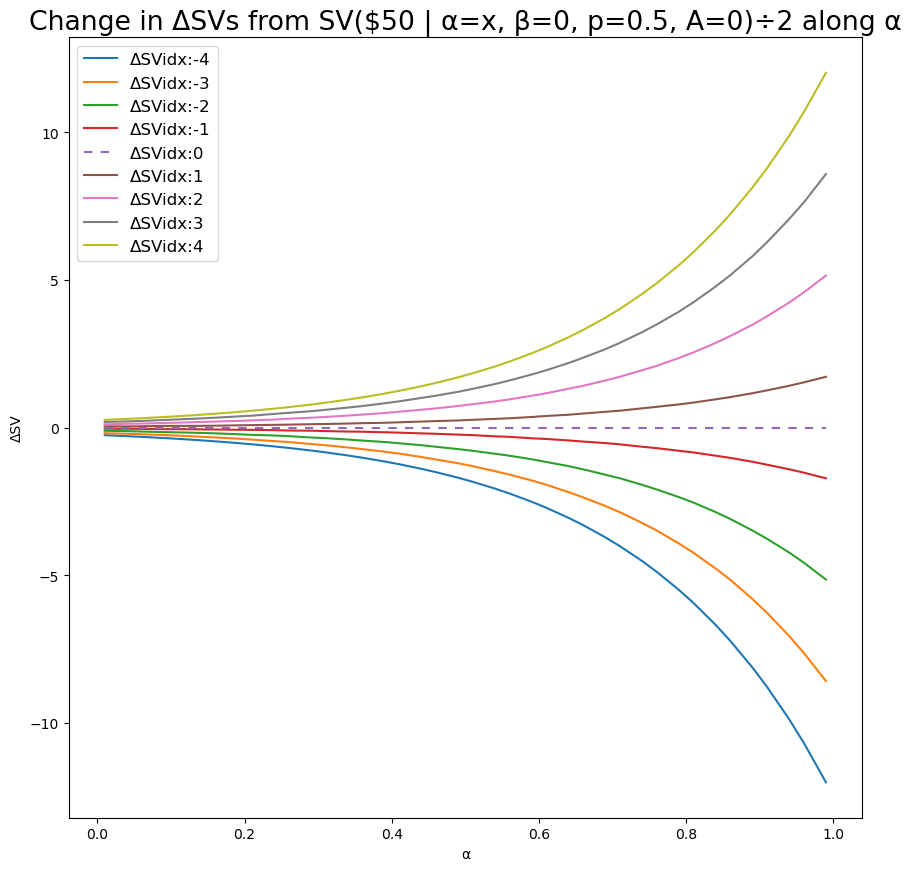

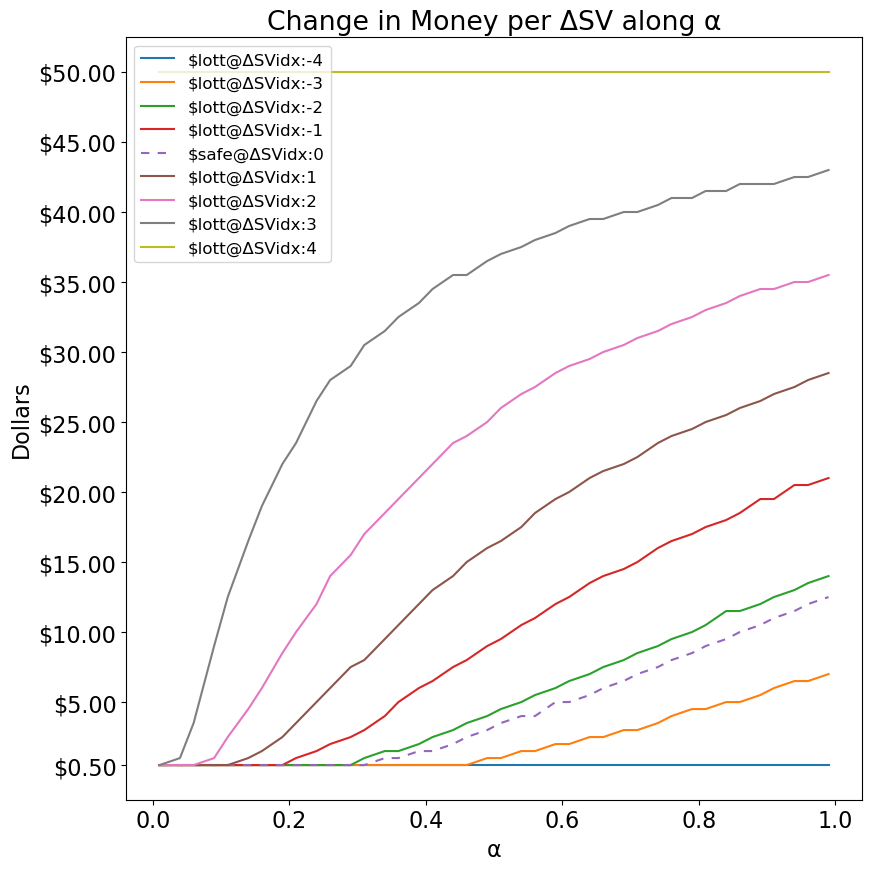

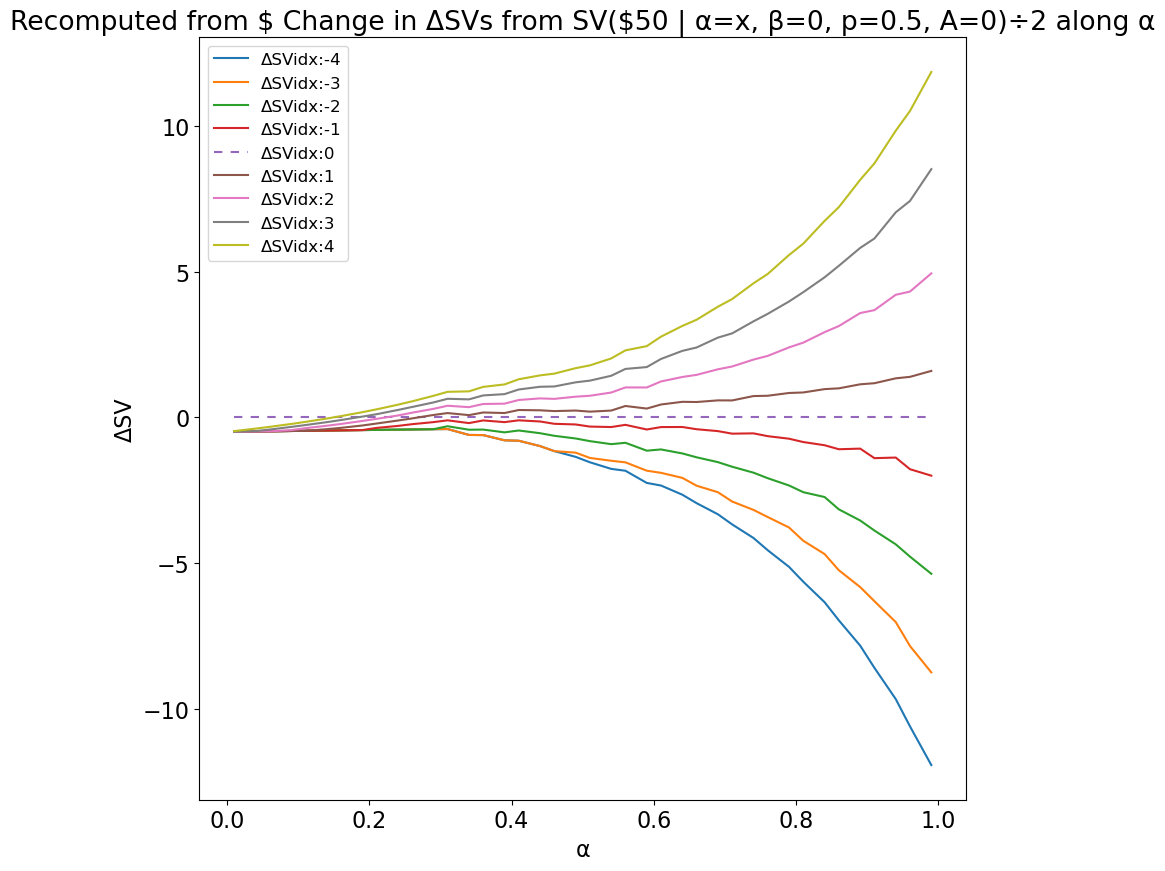

In [29]:
import pylab as plt
import numpy as np
# SVs

plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx==0:
        plt.plot(alphas, np.array(safe_svs_line)-np.array(safe_svs_line), dashes=[4,4], label="ΔSVidx:"+str(idx))
        idx+=1
    elif idx > 0:
        idx+=1
    plt.plot(alphas, np.array(lot_svs_lines)[i]-np.array(safe_svs_line), label="ΔSVidx:"+str(idx))

plt.rcParams.update({'font.size': 12})
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Change in ΔSVs from SV($50 | α=x, β=0, p=0.5, A=0)÷2 along α")
plt.tight_layout()
plt.show()

# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx==0:
        plt.plot(alphas, np.array(safe_money_line), dashes=[4,4], label="$safe@ΔSVidx:"+str(idx))
        idx+=1
    elif idx > 0:
        idx+=1
    plt.plot(alphas, np.array(lot_money_lines)[i], label="$lott@ΔSVidx:"+str(idx))

plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.gca().yaxis.set_major_formatter('${x:1.2f}')
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Change in Money per ΔSV along α")
plt.tight_layout()
plt.show()

# recomputed SVs
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i-4
    if idx==0:
        plt.plot(alphas, np.array(safe_svs_line_recomp)-np.array(safe_svs_line_recomp), dashes=[4,4], label="ΔSVidx:"+str(idx))
        idx+=1
    elif idx > 0:
        idx+=1
    plt.plot(alphas, np.array(lot_svs_lines_recomp)[i]-np.array(safe_svs_line_recomp), label="ΔSVidx:"+str(idx))

plt.rcParams.update({'font.size': 12})
plt.legend()

plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Recomputed from \$ Change in ΔSVs from SV($50 | α=x, β=0, p=0.5, A=0)÷2 along α")
plt.tight_layout()
plt.show()

### Retrieving alpha from stored data values
* sv_option = (p - b*amb/2)*(value**alpha)
* When amb == 0, sv_option = (p)*(value**alpha)
* sv_option/p = value**alpha
* alpha = log(sv_option/p)/log(value)




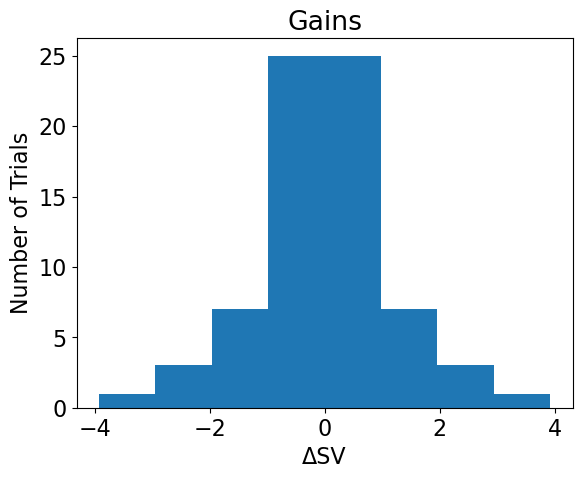

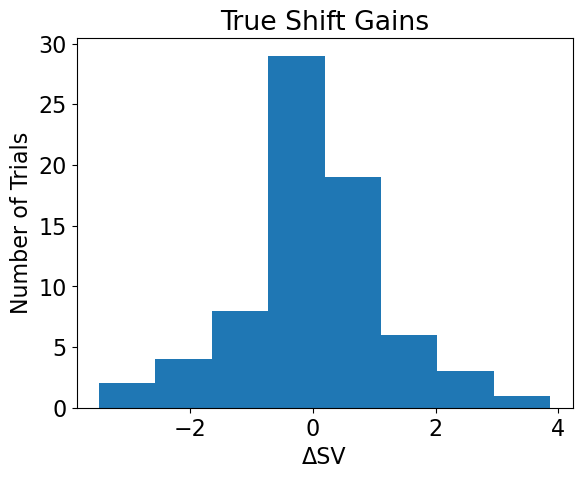

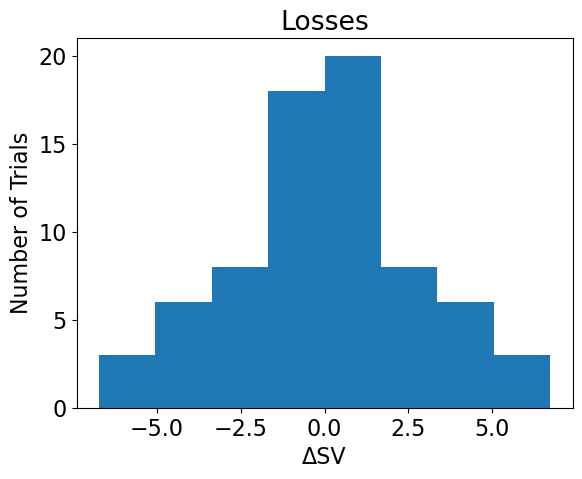

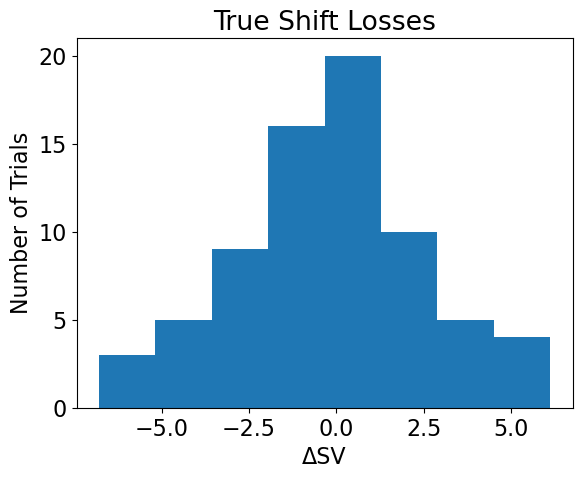

In [30]:
import pylab as plt
import pandas as pd
df = pd.DataFrame(trials)

bins = 8
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins=bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Gains")
plt.show()

plt.hist(df.query("crdm_domain == 1")["crdm_true_delta_sv"], bins=bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("True Shift Gains")
plt.show()

loss = df.query("crdm_domain == -1")["crdm_delta_sv"].values
plt.hist(loss, bins=bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Losses")
plt.show()

plt.hist(df.query("crdm_domain == -1")["crdm_true_delta_sv"], bins=bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("True Shift Losses")
plt.show()

In [31]:
from IPython.display import display, HTML
import pandas as pd
df = pd.DataFrame(trials)
display(HTML(df.to_html()))

,crdm_lott_sv,crdm_safe_sv,crdm_lott,crdm_sure_amt,crdm_lott_p,crdm_amb_lev,crdm_delta_sv,crdm_domain,crdm_true_lott_sv,crdm_true_sure_sv,crdm_true_delta_sv,crdm_sv_half,crdm_quad_idx
0,0.679666,0.000000,0.5,0.5,0.13,0.00,-0.679666,1,0.085768,0.659754,-0.573986,0.679666,0
1,0.679666,0.190000,2.0,0.5,0.13,0.00,-0.489666,1,0.197043,0.659754,-0.462711,0.679666,1
2,0.679666,0.390000,6.0,0.5,0.13,0.00,-0.289666,1,0.380920,0.659754,-0.278834,0.679666,2
3,0.679666,0.580000,12.0,0.5,0.13,0.00,-0.099666,1,0.577367,0.659754,-0.082387,0.679666,3
4,0.679666,0.580000,12.0,0.5,0.13,0.00,-0.099666,1,0.577367,0.659754,-0.082387,0.679666,3
5,0.679666,0.780000,20.0,0.5,0.13,0.00,0.100334,1,0.784443,0.659754,0.124689,0.679666,4
6,0.679666,0.970000,28.5,0.5,0.13,0.00,0.290334,1,0.970175,0.659754,0.310421,0.679666,5
7,0.679666,1.170000,39.0,0.5,0.13,0.00,0.490334,1,1.171068,0.659754,0.511314,0.679666,6
8,0.679666,1.359331,50.0,0.5,0.13,0.00,0.679666,1,1.359331,0.659754,0.699577,0.679666,7
9,1.307049,0.000000,0.5,1.5,0.25,0.00,-1.307049,1,0.164938,1.275425,-1.110486,1.307049,0


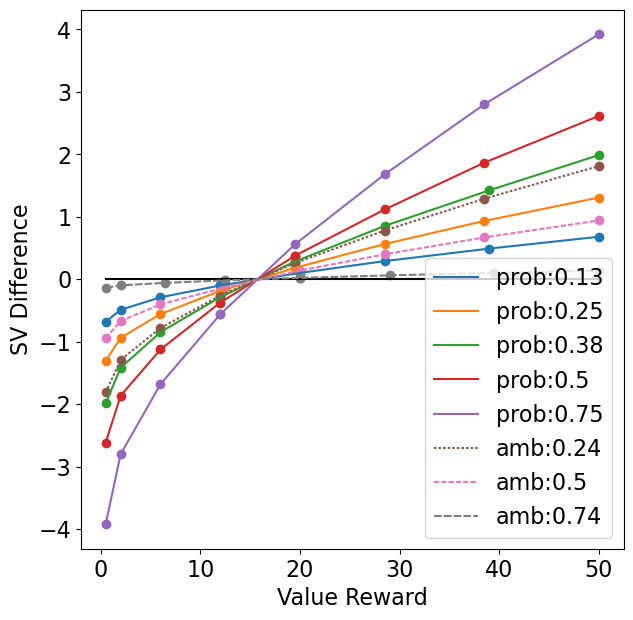

In [32]:
import pandas as pd
import pylab as plt

df = pd.DataFrame(trials)
gain = df.query("crdm_domain == 1")
plt.figure(figsize=(7,7))
plt.plot([0.5,50], [0,0], color="black")
prob_trials = gain.query("crdm_amb_lev == 0")
prob = np.unique(prob_trials["crdm_lott_p"].values)

for p in prob:
    trial_set = prob_trials.query("crdm_lott_p == @p")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sv = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sv[idx], label="prob:"+str(p))
    plt.scatter(money[idx], sv[idx])
amb_trials = gain.query("crdm_amb_lev != 0")
amb = np.unique(amb_trials["crdm_amb_lev"].values)
for a in amb:
    trial_set = amb_trials.query("crdm_amb_lev == @a")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sv = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sv[idx], label="amb:"+str(a), dashes=[5*a,1])
    plt.scatter(money[idx], sv[idx])
plt.xlabel("Value Reward")
plt.ylabel("SV Difference")
plt.legend()
plt.show()


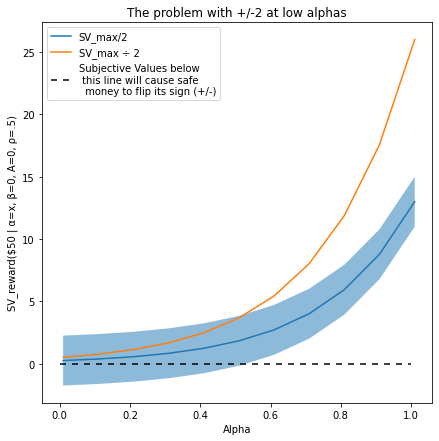

In [31]:
import pylab as plt
import numpy as np
# a sampling of alpha values
xs = np.arange(0.01,1.1,.1)
# probability .5, ambiguity 0
probability = .5
money = 50
ys = np.array([(probability * money**alpha)/2 for alpha in xs])
plt.figure(figsize=(7,7))
plt.plot(xs, ys, label="SV_max/2")
plt.plot(xs, ys*2, label="SV_max ÷ 2")
plt.plot([0,1], [0,0], color='black', dashes=[4, 4], label="Subjective Values below\n this line will cause safe\n  money to flip its sign (+/-)")
error = np.zeros(ys.shape)+2
# alpha (as in the transparency) is .5
plt.fill_between(xs, ys-error, ys+error, alpha=.5)
plt.xlabel("Alpha")
plt.ylabel("SV_reward($50 | α=x, β=0, Α=0, ρ=.5)")
plt.title("The problem with +/-2 at low alphas")
plt.legend()
plt.show()

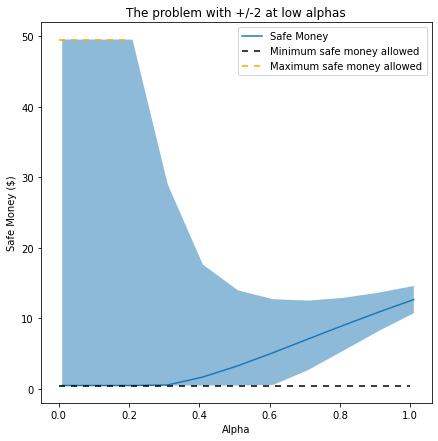

In [168]:
import pylab as plt
import numpy as np

def safe_money(SV, alpha):
    return np.sign(SV)*(abs(SV)**(1./alpha))

# a sampling of alpha values
xs = np.arange(0.01,1.1,.1)
# probability .5, ambiguity 0
probability = .5
money = 50
ys = np.array([(probability * money**alpha)/2 for alpha in xs])


plt.figure(figsize=(7,7))

error = np.zeros(ys.shape)+2
ys_min = np.zeros(ys.shape)+.5
ys_max = np.zeros(ys.shape)+49.5
low = safe_money(ys-error, xs)
high = safe_money(ys+error, xs)

# constrain amounts between .5 and 49.5
idx = np.where(low < ys_min)
low[idx] = ys_min[idx]
idx = np.where(high > ys_max)
high[idx] = ys_max[idx]

# alpha (as in the transparency) is .5
plt.fill_between(xs, low, high, alpha=.5)
ys = safe_money(ys, xs)
idx = np.where(ys < ys_min)
ys[idx] = ys_min[idx]
plt.plot(xs, ys, label="Safe Money")
plt.xlabel("Alpha")
plt.ylabel("Safe Money ($)")
plt.title("The problem with +/-2 at low alphas")
plt.plot([0,1], [0.5,0.5], color='black', dashes=[4, 4], label="Minimum safe money allowed")
plt.plot([0,.2], [49.5,49.5], color='orange', dashes=[4, 4], label="Maximum safe money allowed")
plt.legend()
plt.show()

In [79]:
%%HTML
<script>
        "use strict";
        //# this line of "var" should not be included in Pavlovia/PsychJS scripts!
        //#  Pavlovia automatically declares variables.
        var numeric, zeros, group_parallel, unravel, argmax, argmin, values, nansum, normal, sensitivity_function, sqrt2, psych_function, yes_no_psych_function, recur, reformat_params, log, mulPosteriorLikelihood, mul_log, QuestPlus
</script>

## numeric library

In [81]:
%%HTML
<script>
        "use strict";
        zeros = function(shape) {
            // make an array of zeros with the given shape.
            return values(shape, 0.0);
        }
        
        
        group_parallel = function(X,Y) {
            // make a matrix like X have an additional dimension of length 1 at the end.
            // i.e., X with a shape of [2,2] becomes [2,2,1].
            var i=0, shape=numeric.dim(X);
            var l = shape.length;
            var func = "";
            var cap = "";
            var indices = "";
            for (;i<l-1;i++) {
                func = func.concat("X.forEach((function(item, index",i,"){ ");
                cap = cap.concat("}))");
                indices+="[index".concat(i,"]");
            }
            indices+="[index".concat(i,"]");
            var Z = numeric.clone(X)
            func = func.concat("item.forEach((function(item, index",i,"){Z",indices," = [X",indices,", Y",indices,"]; }))", cap);
            eval(func);
            return Z;
        }
        
        unravel = function(X) {
            return eval("["+String(X)+"]")
        }
        
        
        argmax = function(X) {
            var idx = 0;
            X = unravel(X);
            var max = X[0];
            X.forEach((function(item, index){ if (max < item) {max = item; idx = index}}));
            return idx;
        }
        
        
        argmin = function(X) {
            var idx = 0;
            X = unravel(X);
            var min = X[0];
            X.forEach((function(item, index){ if (min > item) {min = item; idx = index}}));
        
            return idx;
        }
        
        values = function(shape, value) {
            var s = String(value), i=0, l;
            if (Array.isArray(shape))
                l = shape.length;
            else {
                l = 1;
                shape = [shape];
            }
            shape =numeric.clone(shape);
            shape.reverse();
            for (;i<l;i++){
                s+=",";
                s = "["+s.repeat(shape[i])+"]";
            }
            return eval(s);
        }
        
        nansum = function(X) {
            var sum = 0.0;
            X.forEach((function(X,idx){if (!isNaN(X)) sum += X}));
            return sum;
        }
        
        
        
        
        
        //https://stackoverflow.com/questions/5259421/cumulative-distribution-function-in-javascript
        normal = function(x, mean, std) {
          var x = (x - mean) / std
          var t = 1 / (1 + .2315419 * Math.abs(x))
          var d =.3989423 * Math.exp( -x * x / 2)
          var prob = d * t * (.3193815 + t * ( -.3565638 + t * (1.781478 + t * (-1.821256 + t * 1.330274))))
          if( x > 0 ) prob = 1 - prob
          return prob
        }
        //# tau is the sensitivity threshold
        sensitivity_function = function(s, tau, gamma, beta=5){
            return (beta*((s/tau)**gamma))/Math.sqrt(((beta**2)-1)+(s/tau)**(2*gamma));
        }
        sqrt2 = Math.sqrt(2);
        psych_function = function(s_diff, params){
            var tau, gamma, beta;
            var dp_diff = Math.sign(s_diff)*sensitivity_function(Math.abs(s_diff), tau=params[0], gamma=params[1]);
            return 1-normal((params[2]-dp_diff)/sqrt2,0,1);
        }
    
        //# threshold is parameter 0 in params
        yes_no_psych_function = function(s_diff, params){
            var tau, gamma, beta;
            var dp = Math.sign(s_diff)*sensitivity_function(Math.abs(s_diff), tau=params[0], gamma=params[1]);
            return 1 - normal(params[2] - dp, 0, 1);
        }
        
        //# need to remove/fix everywhere using sum_axis or argmin with axis option.
        //# the other default options (without axes and not approximating) are working though!
        //# (which is what you need for the online experiment!)
        
        //# ""...Array" in javascript is the same as *args in Python.
        recur = function(params, ...group) {
            if (params.length == 0) {
                return [group];
            }
            var l = params[0].length;
            var groups = [];
            for (var x=0; x < l; x++) {
                groups.push(...recur(params.slice(1), ...group, params[0][x]));
            }
            return groups;
        }
        
        reformat_params = function(params){
            //'''Get every combination of parameters'''
            return recur(params)
        }
        
        
        log = Math.log;
        // much more efficient than using numeric as I was
        mulPosteriorLikelihood = function(post,like) {
            return like.map((function(X0){ return X0.map((function(X1, i1){return [X1[0]*post[i1], X1[1]*post[i1]]}))}));
        }

        mul_log = function(arr) {
            return arr.map((function(X0){return X0.map((function(X1){return X1.map((function(X2){return X2*Math.log(X2)}))}))}));
        }
        
        QuestPlus = class {
            constructor(stim, params, func) {
                this.function = func;
                this.stim_domain = stim;
                this.param_domain = reformat_params(params);
        
                this._orig_params = numeric.clone(params);
                this._orig_param_shape = numeric.dim(params);
                this._orig_stim_shape = numeric.dim(params);
        
                var n_stim = this.stim_domain.length, n_param = this.param_domain.length;
        
                // setup likelihoods for all combinations
                // of stimulus and model parameter domains
                //this.likelihoods = zeros([n_stim, n_param, 2]);
                
                var results = []
                for (var p = 0.0; p<n_param; p++){
                    var tmp = this.param_domain[p];
                    var res = this.stim_domain.map((function(stimulus){ return func(stimulus, tmp)}));
                    results.push(res);
                }
                results = numeric.transpose(results);
                var results2 = numeric.sub(1.0, results);
                // [n_stim, n_param, 2]
                this.likelihoods = group_parallel(results, results2);
        
                // we also assume a flat prior (so we init posterior to flat too)
                this.posterior = values(n_param, 1.0/n_param);
                //this.posterior = arithmeticXV(this.posterior, "/", this.posterior.sum());
        
                this.stim_history = [];
                this.resp_history = [];
                this.entropy = values(n_stim,1.0);
            }
            update(contrast_idx, response){
                /*'''Update posterior probability with outcome of current trial.
        
                contrast - contrast value for the given trial
                response   - whether response was 1 or 0
                              
                '''*/
        
                // turn response into a response index
                var resp_idx = 1 - response;
                
                // take likelihood of such resp for whole model parameter domain
                var likelihood = numeric.transpose(this.likelihoods[contrast_idx])[resp_idx];
                numeric.muleq(this.posterior,likelihood);
                numeric.diveq(this.posterior, numeric.sum(this.posterior));
                
                // log history of contrasts and responses
                this.stim_history.push(this.stim_domain[contrast_idx]);
                this.resp_history.push(response);
            }
        
            next_contrast(){
                /*'''Get contrast value minimizing entropy of the posterior
                distribution.
        
                Expected entropy is updated in this.entropy.
        
                Returns
                -------
                contrast : contrast value for the next trial.'''*/
                // full posterior needs to be i.e., shape [stims, parameter combinations, 2]
                //  and posterior is assumed flat
                var unormed_full_posterior;//mulPosteriorLikelihood(this.posterior, this.likelihoods);
                //var full_posterior = [];
                //var log_full = [];
                //var norm = [];
                var summed0 = 0;
                var summed1 = 0;
                var nansummed0 = 0;
                var nansummed1 = 0;
                // nansum is negated already while making it, so no H
                //var nansums = [];
                var entropy;
                var min_idx = 0, min = 9999;
                // use as few loops as possible to get the arrays
                // we need
                var posterior = this.posterior;
                var a,b;
                
                this.likelihoods.forEach((function(X0,i0){
                    summed0=0; 
                    summed1=0;
                    nansummed0 = 0;
                    nansummed1 = 0;
                    //full_posterior.push([]); 
                    unormed_full_posterior = [];
                    //log_full.push([]);
                    // the sums need to be obtained ahead of time
                    // to normalize (+1 loop) 
                    X0.forEach(function(X1,i1){
                        a = posterior[i1]*X1[0];
                        b = posterior[i1]*X1[1];
                        summed0 += a; 
                        summed1 += b;
                        unormed_full_posterior.push([a,b]);
                    });
                    // get the log * normed, the sums needed to norm, the normed,
                    //  and the nansums of the log products
                    unormed_full_posterior.forEach((function(X1){
                        var tmp0 = X1[0]/summed0, tmp1 = X1[1]/summed1; 
                        //var ltmp0 = null, ltmp1 = null;
                        if (tmp0 > 0){
                            var ltmp0 = tmp0*log(tmp0)
                            nansummed0 += ltmp0;
                        }
                        if (tmp1 > 0){
                            var ltmp1 = tmp1*log(tmp1);
                            nansummed1 += ltmp1;
                        }
                        
                        /*if (!isNaN(ltmp0)) 
                            nansummed0 += ltmp0;
                        if (!isNaN(ltmp1))
                            nansummed1 += ltmp1;*/
                        //log_full[i0].push([ltmp0, ltmp1]);
                        //full_posterior[i0].push([tmp0, tmp1]);
                    }));
                    // store the nansums of each column
                    //nansums.push([-nansummed0, -nansummed1]); 
                    // store the values used to norm each column
                    //norm.push([summed0, summed1]);
                    entropy = -nansummed0*summed0 -nansummed1*summed1;
                    if (entropy < min) {
                        min = entropy;
                        min_idx = i0;
                    }
                    
                    //entropy.push(entropy)
                }));
                
                // get the entropy
                //this.entropy = norm.map(function(X, idx){return nansums[idx][0]*X[0]+nansums[idx][1]*X[1]});
                //this.entropy = entropy;
        
                // choose contrast idx with minimal entropy
                //return argmin(this.entropy);
                return min_idx;
            }
        
            get_posterior() {
                return reshape(this.posterior, this._orig_param_shape);
            }
            get_fit_params(){
                return this.param_domain[argmax(this.posterior)];
            }
        }
    
            
    </script>


In [96]:
%%HTML
<script>

var stim_space = range(-100, 101, 2)
var tau_space = range(10, 51, 1)
var gamma_space = arange(0.1,10,.2, 1)
var lambda_space = arange(-1,1.1,.1, 1)

var params = [tau_space, gamma_space, lambda_space];


var contrast_idx;
var response = true;
</script>

In [97]:
%%HTML
<div id=params></div>
<div id=threshold></div>
<script>
function draw_from(stimulus_value, params, func=yes_no_psych_function){
    var prob = func(stimulus_value, params);
    if (Math.random() < prob)
        return 1;
    else
        return 0;
}
var response;
// # uses the contrast_idx instead of contrast for speed reasons.
// # doesn't ever estimate the contrast
contrast_idx = parseInt(stim_space.length/2);
// # the threshold being estimated
var true_threshold = 21;
var q = new QuestPlus(stim_space, params, yes_no_psych_function);
// # 100 trials
for (var i=0; i < 100; i++) {
    t0 = performance.now()
    // # update the posterior
    q.update(contrast_idx, draw_from(stim_space[contrast_idx], [true_threshold,5.5,0.5]));
    // # find the next contrast index
    contrast_idx=q.next_contrast();
    t1 = performance.now()
    console.log(i, stim_space[contrast_idx], q.get_fit_params(), t1-t0);
}
var fit = q.get_fit_params();
console.log(fit, contrast_idx);
document.getElementById("params").innerHTML = "Params " +String(fit);
document.getElementById("threshold").innerHTML = "Estimated Threshold ".concat(fit[0]," vs True Threshold ", true_threshold);

</script>